# Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:

train_data= pd.read_csv('D:/House grade/TRAINING.csv')
test_data= pd.read_csv('D:/House grade/test.csv')

In [3]:
train_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [4]:
test_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,YES,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,NO,0.0,76.0,2,64.0,4,3031$


In [5]:
print(train_data.shape)
print(test_data.shape)

(7000, 14)
(3299, 13)


In [6]:
#Merge data
data = train_data.append(test_data, ignore_index=True, sort=False)
data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [7]:
data.columns

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

In [8]:
data.nunique()

id             7000
Area(total)      71
Troom             5
Nbedrooms         7
Nbwashrooms       7
Twashrooms        6
roof              2
Roof(Area)       51
Lawn(Area)       41
Nfloors           8
API              41
ANB               6
Grade             5
EXPECTED       2198
dtype: int64

In [9]:
data.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [10]:
data['Twashrooms']=data['Twashrooms'].fillna(data['Twashrooms'].mode()[0])

In [11]:
data['Nbwashrooms']=data['Nbwashrooms'].fillna(data['Nbwashrooms'].mode()[0])


In [12]:
data['Troom']=data['Troom'].fillna(data['Troom'].mode()[0])

In [13]:
data['Lawn(Area)']=data['Lawn(Area)'].fillna(round(data['Lawn(Area)'].mean()))

In [14]:
data['API']=data['API'].fillna(round(data['API'].mean()))

In [15]:
data['Nbedrooms'][data['Nbedrooms'].isnull()==True]=data['Nbwashrooms'][data['Nbedrooms'].isnull()==True]

C:\Users\Prathmesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#cheking missing values of null in roof
rows=data[data['roof'].isnull()==True].index.values

In [17]:
#impute missing values with random yes & no values
import random
data['roof'][data['roof'].isnull()==True]=data['roof'][data['roof'].isnull()==True].apply(lambda x: random.choice(['NO','YES']))

C:\Users\Prathmesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data.roof.replace(('YES', 'NO'), (1, 0), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 14 columns):
id             10299 non-null int64
Area(total)    10299 non-null int64
Troom          10299 non-null float64
Nbedrooms      10299 non-null float64
Nbwashrooms    10299 non-null float64
Twashrooms     10299 non-null float64
roof           10299 non-null int64
Roof(Area)     8293 non-null float64
Lawn(Area)     10299 non-null float64
Nfloors        10299 non-null int64
API            10299 non-null float64
ANB            10299 non-null int64
Grade          7000 non-null object
EXPECTED       10299 non-null object
dtypes: float64(7), int64(5), object(2)
memory usage: 1.1+ MB


In [20]:
data.isnull().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [21]:
data['Grade'].unique()

array(['D', 'B', 'C', 'A', 'E', nan], dtype=object)

In [22]:
data.drop(['Roof(Area)'], axis=1, inplace=True)

In [23]:
data.isnull().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [24]:
data['EXPECTED']=data['EXPECTED'].replace({'\$':''}, regex=True)

In [25]:
#Train test split

train_d = data.iloc[:7000]
test_d = data.iloc[7000:]

In [26]:
test_d.drop(['Grade'], axis=1, inplace=True)

C:\Users\Prathmesh\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
print(train_d.shape)
print(test_d.shape)

(7000, 13)
(3299, 12)


In [28]:
train_d['Grade'].unique()

array(['D', 'B', 'C', 'A', 'E'], dtype=object)

In [29]:
train_d['Grade_n'],_= pd.factorize(train_d['Grade'],sort=True)

C:\Users\Prathmesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
train_d.drop(['Grade','id','Nbwashrooms'], axis=1, inplace=True)

In [31]:

train_d.columns = ['Area(total)', 'Troom', 'Nbedrooms', 'Twashrooms',
       'roof', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED','Grade']
train_d.head()

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,305,8.0,2.0,3.0,0,76.0,2,63.0,4,3826,3
1,344,6.0,7.0,8.0,0,83.0,7,97.0,1,4458,1
2,294,8.0,4.0,4.0,1,78.0,1,88.0,4,4199,2
3,328,5.0,4.0,4.0,0,91.0,5,86.0,1,3462,3
4,295,9.0,5.0,5.0,0,97.0,4,93.0,3,4543,2


In [32]:
test_d.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED
7000,1,348,9.0,5.0,3.0,5.0,1,84.0,5,91.0,6,4422
7001,2,311,6.0,5.0,5.0,6.0,0,86.0,6,83.0,4,3432
7002,3,342,5.0,6.0,6.0,7.0,1,85.0,4,95.0,5,4066
7003,4,329,7.0,7.0,4.0,6.0,0,105.0,5,97.0,6,4322
7004,5,307,6.0,2.0,3.0,4.0,0,76.0,2,64.0,4,3031


In [33]:
test_d.drop(['id','Nbwashrooms'], axis=1, inplace=True)

In [34]:
test_d.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Twashrooms     0
roof           0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [35]:
test_d.columns = ['Area(total)', 'Troom', 'Nbedrooms', 'Twashrooms',
       'roof', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED']
test_d.head()

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED
7000,348,9.0,5.0,5.0,1,84.0,5,91.0,6,4422
7001,311,6.0,5.0,6.0,0,86.0,6,83.0,4,3432
7002,342,5.0,6.0,7.0,1,85.0,4,95.0,5,4066
7003,329,7.0,7.0,6.0,0,105.0,5,97.0,6,4322
7004,307,6.0,2.0,4.0,0,76.0,2,64.0,4,3031


In [36]:
summary_roof=pd.concat([pd.crosstab(train_d[x], train_d.roof) for x in train_d.columns[10:11]], keys=train_d.columns[10:11])
summary_roof

roof            0     1
      Grade            
Grade 0       152   290
      1       614   861
      2      1449  1479
      3      1284   845
      4        26     0

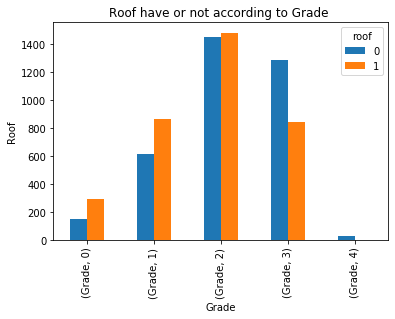

In [37]:
#In order to get a better understanding of our data, we decided to explore it visually

summary_roof.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Roof')
plt.title('Roof have or not according to Grade ')
plt.show()

Text(0.5, 1.0, 'Area')

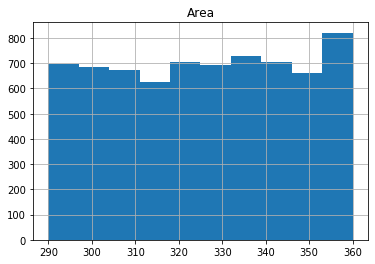

In [38]:

train_d['Area(total)'].hist()
plt.title('Area')

Text(0.5, 1.0, 'Grade')

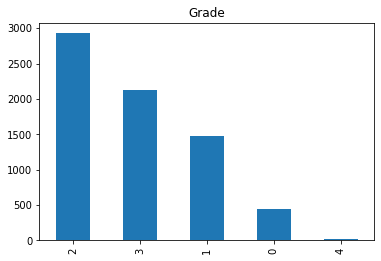

In [39]:
train_d['Grade'].value_counts().plot(kind='bar')
plt.title('Grade')

In [40]:
X=train_d[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]
y=train_d['Grade']

X1=test_d[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest

In [42]:
model_rf = RandomForestClassifier(criterion='entropy',random_state = 1,n_estimators = 40)
model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

acc_rf="{0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test)))
print(confusion_matrix(y_test, y_test_pred_rf))
cv_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
print("rf cross val score:-",round(cv_rf.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_rf))

Accuracy 85.52%
[[ 96  37   0   0   0]
 [ 14 354  61   0   0]
 [  0  44 741  60   0]
 [  0   0  80 601   0]
 [  0   0   0   8   4]]
rf cross val score:- 86.0
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       133
           1       0.81      0.83      0.82       429
           2       0.84      0.88      0.86       845
           3       0.90      0.88      0.89       681
           4       1.00      0.33      0.50        12

    accuracy                           0.86      2100
   macro avg       0.89      0.73      0.77      2100
weighted avg       0.86      0.86      0.85      2100



In [43]:
from sklearn.model_selection import GridSearchCV

parameters=[{'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['entropy'],'random_state':[0,1,2]},
           {'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['gini'],'random_state':[0,1,2]}]

grid_search= GridSearchCV(estimator= model_rf,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train,y_train)
best_accuracy_rf=grid_search.best_score_
best_parameters_rf=grid_search.best_params_

In [44]:
print(best_accuracy_rf)
print(best_parameters_rf)

0.8722448979591837
{'criterion': 'entropy', 'n_estimators': 90, 'random_state': 0}


# KNN Model

In [45]:
model_knn = KNeighborsClassifier(n_neighbors=80)
model_knn.fit(X_train, y_train)

y_test_pred_knn = model_knn.predict(X_test)
score = model_knn.score(X_test, y_test)

acc_knn="{0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test)))
print(confusion_matrix(y_test, y_test_pred_knn))
cv_knn = cross_val_score(model_knn, X_train, y_train, cv=5)
print("knn cross val score:-",round(cv_knn.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_knn))

Accuracy 63.29%
[[ 57  70   6   0   0]
 [ 25 208 196   0   0]
 [  0  73 687  85   0]
 [  0   0 304 377   0]
 [  0   0   0  12   0]]
knn cross val score:- 67.0
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       133
           1       0.59      0.48      0.53       429
           2       0.58      0.81      0.67       845
           3       0.80      0.55      0.65       681
           4       0.00      0.00      0.00        12

    accuracy                           0.63      2100
   macro avg       0.53      0.46      0.48      2100
weighted avg       0.65      0.63      0.63      2100



C:\Users\Prathmesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
parameters=[{'n_neighbors':[10,20,30,40,50,60,70,80,90]}]

grid_search= GridSearchCV(estimator= model_knn,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_knn=grid_search.best_score_
best_parameters_knn=grid_search.best_params_

In [47]:
print(best_accuracy_knn)
print(best_parameters_knn)

0.6657142857142857
{'n_neighbors': 80}


# SVC

In [48]:
model_svc = SVC(kernel = 'rbf',gamma=0.1, random_state=0)
model_svc.fit(X_train, y_train)

y_test_pred_svc = model_svc.predict(X_test)
score = model_svc.score(X_test, y_test)

acc_svc="{0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test)))
print(confusion_matrix(y_test, y_test_pred_svc))
cv_svc = cross_val_score(model_svc, X_train, y_train, cv=5)
print("svc cross val score:-",round(cv_svc.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_svc))

Accuracy 40.33%
[[  0   0 133   0   0]
 [  0   0 429   0   0]
 [  0   0 845   0   0]
 [  0   0 679   2   0]
 [  0   0  12   0   0]]
svc cross val score:- 43.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00       429
           2       0.40      1.00      0.57       845
           3       1.00      0.00      0.01       681
           4       0.00      0.00      0.00        12

    accuracy                           0.40      2100
   macro avg       0.28      0.20      0.12      2100
weighted avg       0.49      0.40      0.23      2100



C:\Users\Prathmesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
parameters = [{'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3]}]

grid_search = GridSearchCV(estimator = model_svc,param_grid = parameters,scoring = 'accuracy',cv = 5,n_jobs = -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_svc=grid_search.best_score_
best_parameters_svc=grid_search.best_params_

In [50]:
print(best_accuracy_svc)
print(best_parameters_svc)

0.4275510204081633
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [58]:
#Running RF model on test data
y_predictions = model_rf.predict(X1)

In [59]:
test_d["Grade"]=y_predictions

C:\Users\Prathmesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
test_d.at[test_d['Grade']==0,'Grade']='A'
test_d.at[test_d['Grade']==1,'Grade']='B'
test_d.at[test_d['Grade']==2,'Grade']='C'
test_d.at[test_d['Grade']==3,'Grade']='D'
test_d.at[test_d['Grade']==4,'Grade']='E'

test_d.head()

C:\Users\Prathmesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
7000,348,9.0,5.0,5.0,1,84.0,5,91.0,6,4422$$,B
7001,311,6.0,5.0,6.0,0,86.0,6,83.0,4,3432$$,D
7002,342,5.0,6.0,7.0,1,85.0,4,95.0,5,4066$$,C
7003,329,7.0,7.0,6.0,0,105.0,5,97.0,6,4322$$,C
7004,307,6.0,2.0,4.0,0,76.0,2,64.0,4,3031$$,D
